# Homework 2
In this homework assignment, you will explore Auto-MPG Dataset. 

Dataset contains following attributes:
1. mpg (miles per gallon)
2. cylinders (number of cylinders, power unit of an engine)
3. displacement (total volume of all the cylinders in an engine, measured in cubic centimeters [cc])
4. horsepower: (the amount of power an engine develops)
5. weight: (weight of the car)
6. acceleration: (accelaration of the car)
7. year: (model year of the car, two digits representing the year from 19**)
8. origin: (shows the origin of the car, 1 for American, 2 for European and 3 for Asian)
9. car name: (unique name for each car)

You will explore the data types and scales, cardinalities, number of missing values, detect outliers, handle missing values and outliers and create data quality report for original and cleaned dataset.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Read the dataset

In [65]:
adf = pd.read_csv('auto-mpg.csv')

### Q1 (10 points)
Identify the data types (numerical [int, float], categorical) and data scales for all the attributes.

In [18]:
adf.dtypes

numerical =['mpg','displacement','horsepower','acceleration','weight']
categorical =['cylinders','year','origin','carname']

| Attribute  | Data Type  | Data Scale |
|------------|------------|------------|
|     mpg    | Numerical  |  Ratio     |
|cylinders   | Categorical|  Ordinal   |
|displacement| Numerical  |  Ratio     |
|horsepower  | Numerical  |  Ratio     |
|acceleration| Numerical  |  Ratio     |
|weight      | Numerical  |  Ratio     |
|year        | Categorical|  Ordinal   |
|origin      | Categorical|  Nominal   |
|carname     | Categorical|  Nominal   |




### Q2 (20 points)
Identify the cardinalities (number of unique values) and number of missing values for each attribute

In [4]:
for (name, series) in adf.iteritems():
    print('ANALYZING THE COLUMN:', name)
    print('\tTotal number of records', series.size)
    print('\tNumber of missing values', series.isnull().sum())
    print('\tPercentage of missing values{0}%'.format(((series.isnull().sum()/series.size)*100)))
    print('\tNumber of unique values', series.unique().size)

ANALYZING THE COLUMN: mpg
	Total number of records 406
	Number of missing values 8
	Percentage of missing values1.9704433497536946%
	Number of unique values 130
ANALYZING THE COLUMN: cylinders
	Total number of records 406
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 6
ANALYZING THE COLUMN: displacement
	Total number of records 406
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 83
ANALYZING THE COLUMN: horsepower
	Total number of records 406
	Number of missing values 6
	Percentage of missing values1.477832512315271%
	Number of unique values 94
ANALYZING THE COLUMN: weight
	Total number of records 406
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 357
ANALYZING THE COLUMN: acceleration
	Total number of records 406
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 96
ANALYZING THE COLUMN: year
	Total number of records 406
	Number of

### Q3 (20 points)
Visualize the distribution of each attribute (other than carname, since it is unique). Note here that for nominal and ordinal scale attributes, use bar plots. For ratio and interval scale attributes, use histograms.

Hint: To get the counts of numerical (but also nominal) attributes, you can use `value_counts()` method.


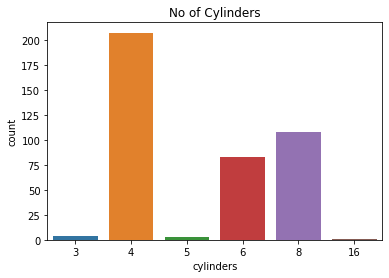

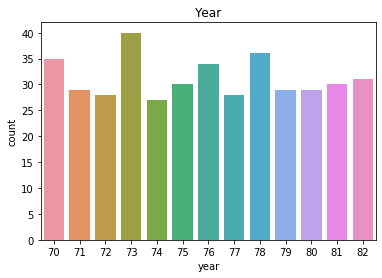

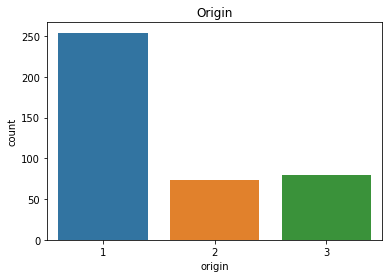

In [32]:
# For categorical attributes
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(adf['cylinders']);
plt.title('No of Cylinders');
plt.show();

sns.countplot(adf['year']);
plt.title('Year')
plt.show();

plt.title('Origin');
sns.countplot(adf['origin']);
plt.show;

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25b1a3c8>,
      dtype=object)

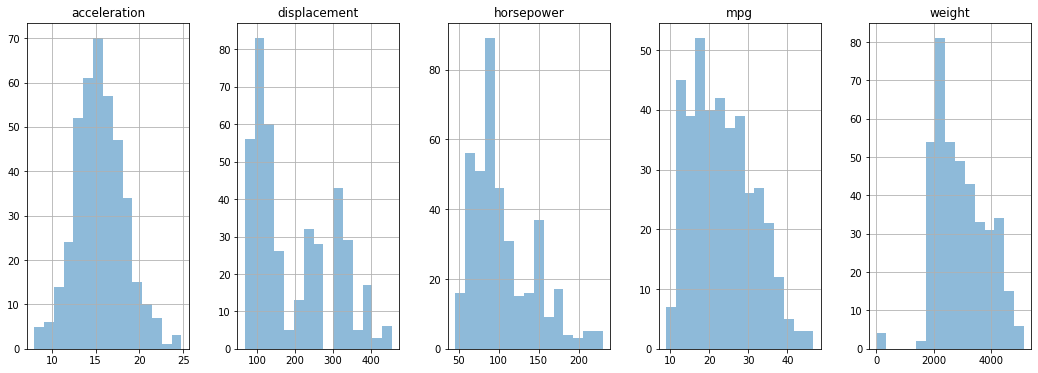

In [25]:
# For numerical attributes

fig, ax=plt.subplots(1,5,figsize=(18,6))
adf_for_hist=adf[numerical]
adf_for_hist.hist(bins=15, alpha=0.5, ax=ax)



### Q4 (20 points)
Using your favorite outlier detection method, identify the outliers for each attribute (other than year, origin, and carname). For each outlier, remove the outlier or replace with a default value.

Hint 1: For simplicity, you can use $\mu \pm 2\sigma$ (alternatively, $3\sigma$) or the interval between $Q1-1.5IQR$ and $Q3+1.5IQR$.

Hint 2: To replace, you can use the median/mean value or minimum/maximum value depending on the direction of the outlier.


In [7]:
# Answer to Q4 goes here

print(adf.shape)

#Finding the outlier

Q1 = adf.quantile(0.25)
Q3 = adf.quantile(0.75)
IQR = Q3 - Q1

#Identifying lower and upper bound outliers for attributes

Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

print(Lower_Fence)

print(Upper_Fence)

#Removing the outlier

adf_out = adf[~((adf < (Q1 - 1.5 * IQR)) |(adf > (Q3 + 1.5 * IQR))).any(axis=1)]

#print the shape after removing outliers

print(adf_out.shape)


(406, 9)
mpg               0.2500
cylinders        -2.0000
displacement   -190.5000
horsepower       -5.6250
weight          132.0000
acceleration      8.4875
year             64.0000
origin           -0.5000
dtype: float64
mpg               46.2500
cylinders         14.0000
displacement     597.5000
horsepower       211.3750
weight          5700.0000
acceleration      22.3875
year              88.0000
origin             3.5000
dtype: float64
(386, 9)


### Q5 (10 points)
Handle the missing values you found in Q2 using kNN imputation. Use `KNNImputer` from `sklearn.imputer` for this task. Set the number of neighbors to 3 and use the column subset of `['cylinders', 'displacement', 'weight']` for imputation.

In [23]:
# Answer to Q5 goes here
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
impute_copy = adf[['mpg', 'horsepower', 'cylinders', 'displacement', 'weight']].copy()

# your code ....

df_filled = knn_imputer.fit_transform(impute_copy)

#Converting to Dataframe
new_df=pd.DataFrame(df_filled)

#To check all the missing values are imputed properly
for (name, series) in new_df.iteritems():
    print('ANALYZING THE COLUMN:', name)
    print('\tTotal number of records', series.size)
    print('\tNumber of missing values', series.isnull().sum())
    print('\tPercentage of missing values{0}%'.format(((series.isnull().sum()/series.size)*100)))
    print('\tNumber of unique values', series.unique().size)

ANALYZING THE COLUMN: 0
	Total number of records 406
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 134
ANALYZING THE COLUMN: 1
	Total number of records 406
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 98
ANALYZING THE COLUMN: 2
	Total number of records 406
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 6
ANALYZING THE COLUMN: 3
	Total number of records 406
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 83
ANALYZING THE COLUMN: 4
	Total number of records 406
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 357


### Q6 (20 points)
Create a Scatter Plot Matrix (a pair plot) of attributes. Use `origin` map plot aspects to different colors. Based on the SPLOM, answer the following questions.

#### Q6.a -  What can you say about the relationship between cylinders and mpg values?
#### Q6.b -  What can you say about the cylinders of Asian cars (origin = 3)?
#### Q6.c -  Is there a correlation between weight and displacement?

Hint: Use keyword argument `hue='origin'` and `markers` to see the differences of cars with different origins.


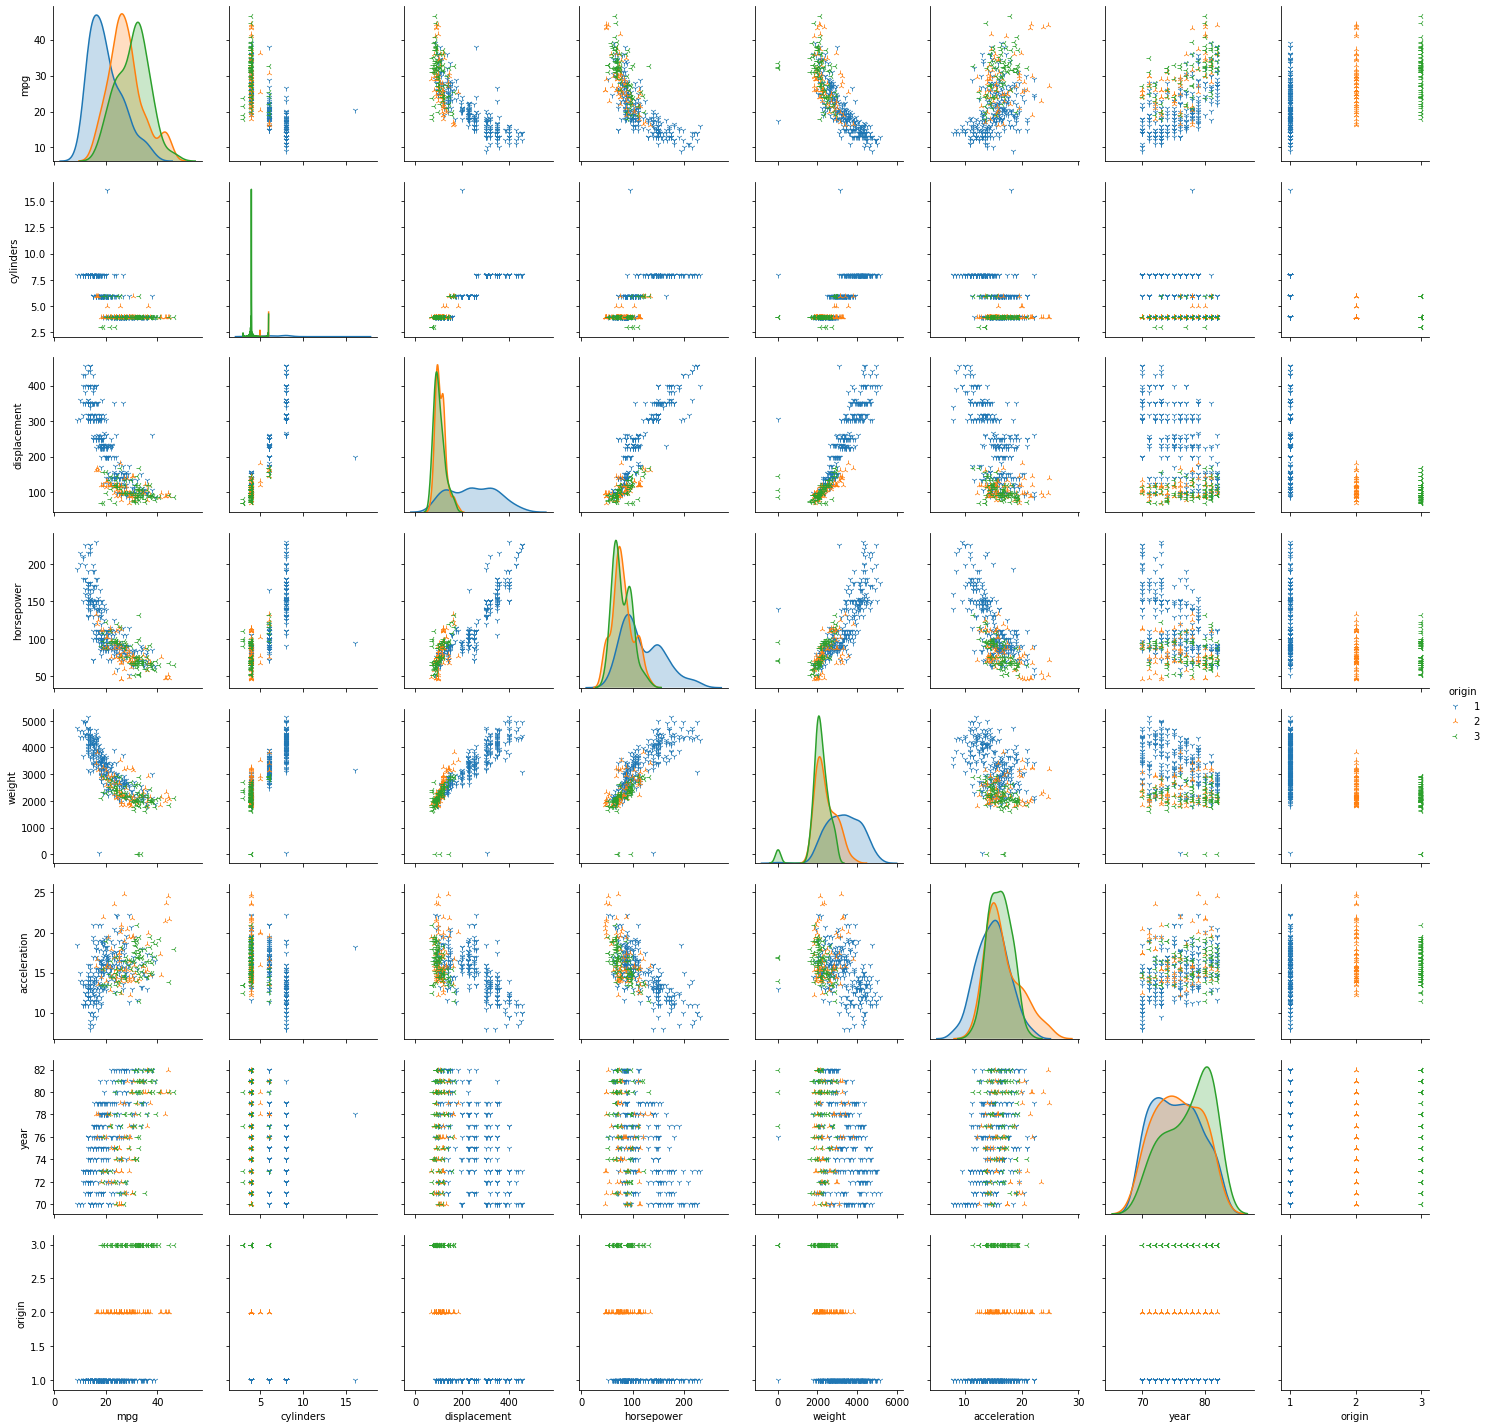

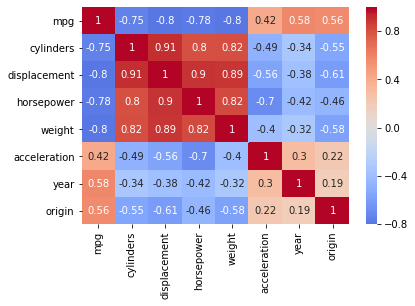

In [14]:
import seaborn as sns

# you answer to Q6 goes here...

sns.pairplot(adf, hue='origin',markers=["1","2","3"])
plt.show();
# Answers

# Q6.a - Ans: Cars with 4 cylinders gives more mileage per gallon compared to 6 and 8 cylinder cars.

# Q6.b - Ans: Almost 85% of the Asian cars comes with 4 cylinders which also gives more miles per gallon. 
#           They have displacement value less than 200 and horse power less than 140.
#           Nearly 98% of the asian cars weigh less than 2800 and acceleration goes upto 20.
            
# Q6.c - Ans: Yes weight and displacement are 89% positively correlated. The heatmap shows the correlation between these two.

sns.heatmap(adf.corr(),annot=True,cmap='coolwarm',center=0)


### Bonus Question (20 points)

Create a data quality report for the Auto-MPG dataset. 

Provide the data quality tables, distributions of categorical and nominal variables.

Also provide your solutions for handling outliers and missing values. 

Create the data quality tables after handling outliers and missing values.

Provide this as a separate PDF file. You can use the cells below to find statistics and create visualizations.


                                        Data Quality Report                                         
                                        -------------------                                         
ABT for Auto-mpg dataset


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,carname
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


Numerical Features


,mpg,displacement,horsepower,acceleration,weight
count,398.000000,406.000000,400.000000,406.000000,406.000000
mean,23.514573,194.779557,105.082500,15.519704,2952.305419
std,7.815984,104.922458,38.768779,2.803359,891.587329
min,9.000000,68.000000,46.000000,8.000000,19.000000
25%,17.500000,105.000000,75.750000,13.700000,2220.000000
50%,23.000000,151.000000,95.000000,15.500000,2811.000000
75%,29.000000,302.000000,130.000000,17.175000,3612.000000
max,46.600000,455.000000,230.000000,24.800000,5140.000000


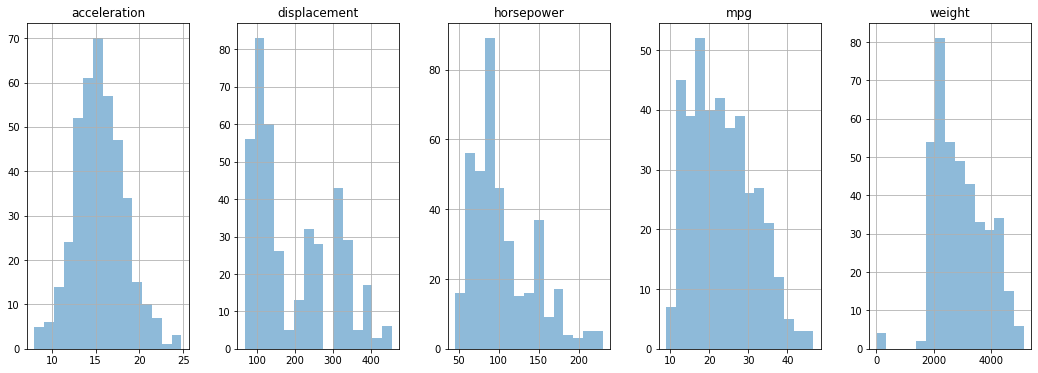

Categorical Features


,cylinders,year,origin
count,406.000000,406.000000,406.000000
mean,5.500000,75.921182,1.568966
std,1.789889,3.748737,0.797479
min,3.000000,70.000000,1.000000
25%,4.000000,73.000000,1.000000
50%,4.000000,76.000000,1.000000
75%,8.000000,79.000000,2.000000
max,16.000000,82.000000,3.000000


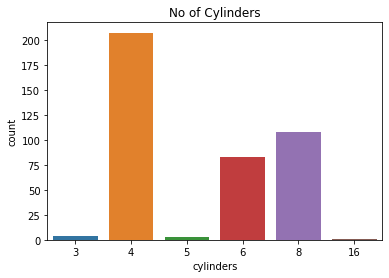

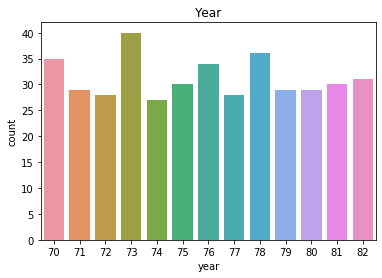

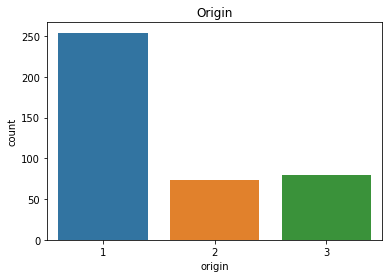

Data Quality table after removing outliers and imputing missing values
Continuous Features


Categorical Features


In [134]:
import plotly.graph_objects as go
import numpy as np
import statistics
from sklearn.impute import KNNImputer

print("Data Quality Report".center(100));
print("-------------------".center(100));

print('\033[1m' + 'ABT for Auto-mpg dataset');
display(adf)


print('\033[1m' + 'Numerical Features');
display(adf[numerical].describe())


fig, ax=plt.subplots(1,5,figsize=(18,6))
adf_for_hist=adf[numerical]
adf_for_hist.hist(bins=15, alpha=0.5, ax=ax)
plt.show();


print('\033[1m' + 'Categorical Features');
display(adf[categorical].describe())



sns.countplot(adf['cylinders']);
plt.title('No of Cylinders');
plt.show();

sns.countplot(adf['year']);
plt.title('Year')
plt.show();

plt.title('Origin');
sns.countplot(adf['origin']);
plt.show();

#For handling outliers and missing values
#Finding the outlier

Q1 = adf.quantile(0.25)
Q3 = adf.quantile(0.75)
IQR = Q3 - Q1

#Identifying lower and upper bound outliers for attributes

Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

#Removing the outlier

adf_out = adf[~((adf < (Q1 - 1.5 * IQR)) |(adf > (Q3 + 1.5 * IQR))).any(axis=1)]

#impute missing values
knn_imputer = KNNImputer(n_neighbors=3)
impute_copy = adf[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration','year','origin']].copy()

df_filled = knn_imputer.fit_transform(impute_copy)

#Converting to Dataframe
new_df=pd.DataFrame(df_filled)
new_df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration','year','origin']

print('\033[1m' + 'Data Quality table after removing outliers and imputing missing values');

print('\033[1m' + 'Continuous Features');

fig = go.Figure(data=[go.Table(header=dict(values=['Feature', 'Count', '%Missing Value','Cardinality','Min','1st Qrt.','Median','3rd Qrt.','Max','Std.dev']),
                 cells=dict(values=[['mpg','displacement','horsepower','weight','acceleration'], [new_df['mpg'].count(), new_df['displacement'].count(), new_df['horsepower'].count(), new_df['acceleration'].count(),new_df['weight'].count()],[new_df['mpg'].isnull().sum(),new_df['displacement'].isnull().sum(),new_df['horsepower'].isnull().sum(),new_df['weight'].isnull().sum(),new_df['acceleration'].isnull().sum()],[new_df['mpg'].unique().size,new_df['displacement'].unique().size,new_df['horsepower'].unique().size,new_df['weight'].unique().size,new_df['acceleration'].unique().size],[new_df['mpg'].min(),new_df['displacement'].min(),new_df['horsepower'].min(),new_df['weight'].min(),new_df['acceleration'].min()],[new_df['mpg'].quantile(0.25),new_df['displacement'].quantile(0.25),new_df['horsepower'].quantile(0.25),new_df['weight'].quantile(0.25),new_df['acceleration'].quantile(0.25)],[new_df['mpg'].median(),new_df['displacement'].median(),new_df['horsepower'].median(),new_df['weight'].median(),new_df['acceleration'].median()],[new_df['mpg'].quantile(0.75),new_df['displacement'].quantile(0.75),new_df['horsepower'].quantile(0.75),new_df['weight'].quantile(0.75),new_df['acceleration'].quantile(0.75)],[new_df['mpg'].max(),new_df['displacement'].max(),new_df['horsepower'].max(),new_df['weight'].max(),new_df['acceleration'].max()],[new_df['mpg'].std(),new_df['displacement'].std(),new_df['horsepower'].std(),new_df['weight'].std(),new_df['acceleration'].std()]]))
                     ])
fig.update_layout(width=1500, height=400)
fig.show()


print('\033[1m' + 'Categorical Features');

fig1 = go.Figure(data=[go.Table(header=dict(values=['Feature', 'Count', '%Missing Value','Cardinality','Mode']),
                 cells=dict(values=[['Cylinders','Origin','Year'], [new_df['cylinders'].count(), new_df['origin'].count(), new_df['year'].count()],[new_df['cylinders'].isnull().sum(),new_df['origin'].isnull().sum(),new_df['year'].isnull().sum()],[new_df['cylinders'].unique().size,new_df['origin'].unique().size,new_df['year'].unique().size],[statistics.mode(adf['cylinders']),statistics.mode(adf['origin']),statistics.mode(adf['year'])]]))
                     ])

fig1.show()
